# Bank Churn Analysis - 
#### Exploratory Data Analytics / Root Cause Analytics

1. Domain Exploration
    - Understand the relevant business process, business impact
    - Common challenges and beleifs
    - Sources of data and external factors
    
    
2. Data Collection and Data Exploration
    - Collect data from multiple units of business, prepare the dataset
    - Perform a generic exploration on data to identify common challenges in data quality
    
    
3. Data Cleaning
    - Handling duplicates, unwanted columns, missing values, outliers
    
    
4. EDA / RCA
    - Data Visualization
        - Univariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
        
    - Statistical methods
        - Correlation Analysis
        - ANOVA
        - Chi Square Test
    
    
5. Prepare report

## 2. Data Collection and Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load data
df = pd.read_csv(r"E:\Xebia\xebia_training_data\datasets\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# unwanted columns - CustomerID, RowNumber, Surname

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### Note
    - atleast 25% of the customers have balance=0 in their account

## 3. Data Cleaning

In [9]:
# check for duplicate entries
df.duplicated().sum()

0

In [10]:
# check for unwanted columns
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# dropping unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## 3. Exploratory Data Analytics
### Data Visualization
#### Univariate Analysis

- try to explore one variable at a time individually and explore the distribution
- Categorical data - Discrete Frequency Distribution - countplot
- Numeric Data - Continuous Frequency Distribution - histogram

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

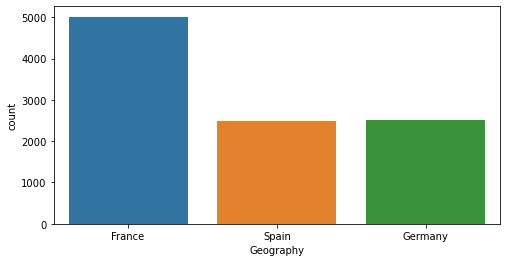

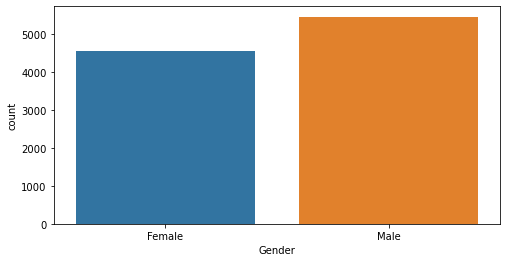

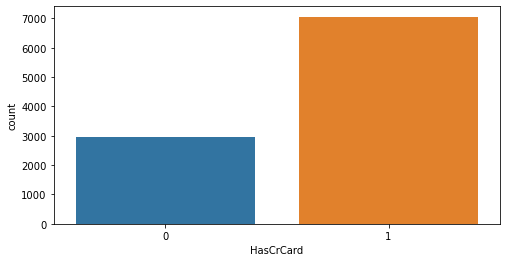

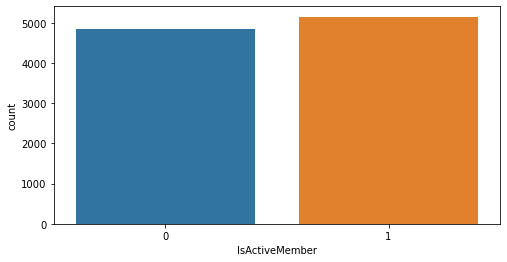

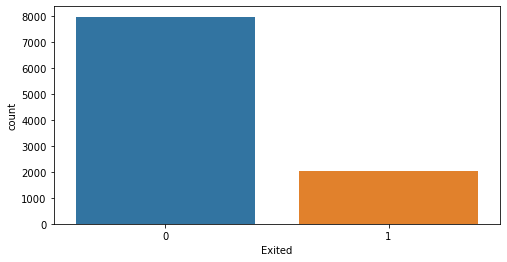

In [15]:
cats = ['Geography', 'Gender',  'HasCrCard', 'IsActiveMember', 'Exited']
for column in cats:
    plt.figure(figsize=(8,4))
    sns.countplot(df[column])
    plt.show()

#### Note - 
    - Almost 50% of customers are from France, rest from Spain and germany
    - males customers are slightly higher compared to female customers
    - approx 70% of customers have credit card
    - almost 50% of customers are not using back accounts actively,
    - approx 20% of customers left the bank
    

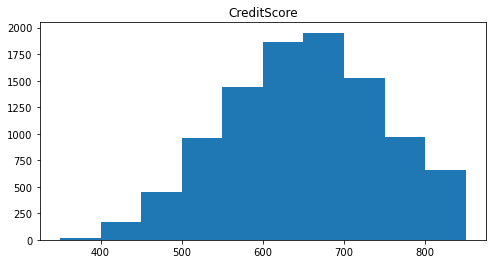

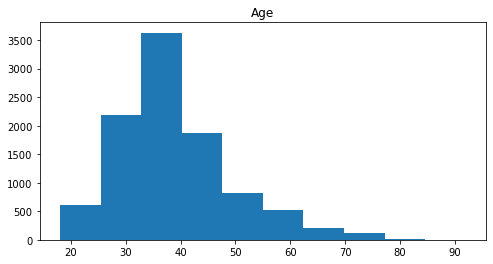

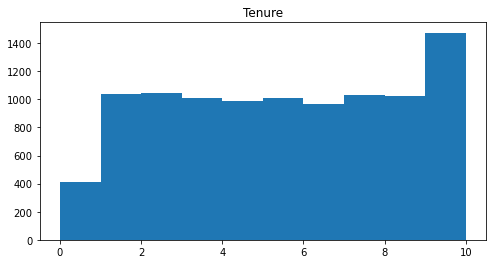

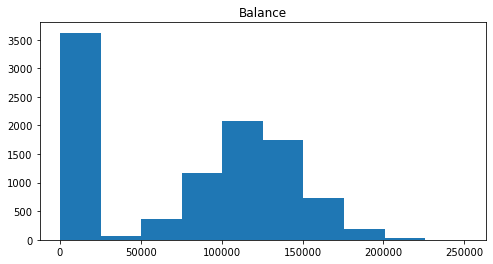

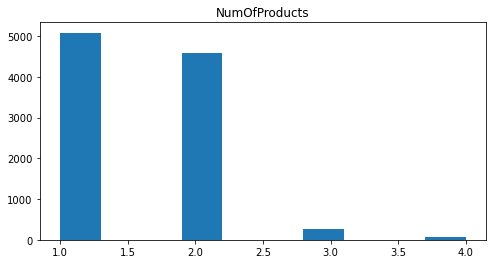

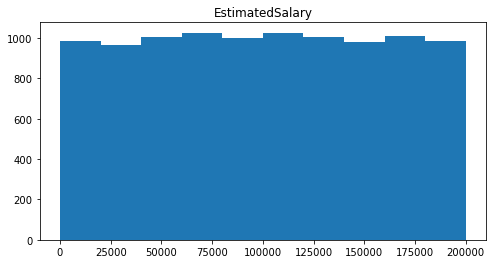

In [16]:
# Numeric data
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for column in nums:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

#### Note - 
    - most of the customers have creditscore between 500 to 800
    - most of the customers have age between 25 to 50, there are some outliers
    - Tenure has almost a uniform distribution
    - there are two groups of customers, one having 0 balance, others having 75k to 175k
    - most of customers have 1 or 2 products
    - Salary has almost a uniform distribution 

#### Bivariate Analysis

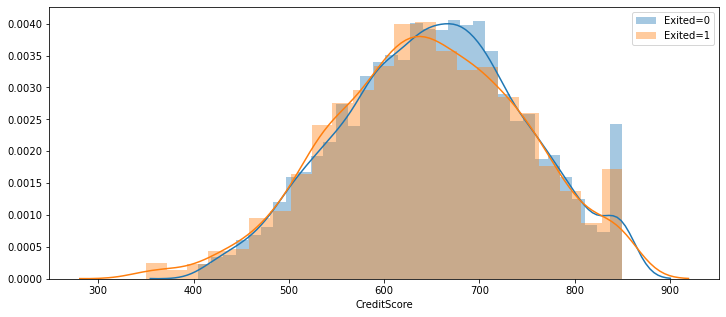

In [17]:
# numeric v/s categorical - probability density distribution -- distplot
# creditscore v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['CreditScore'][df.Exited==0])
sns.distplot(df['CreditScore'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

##### Note = 
    - As both the distributions, for Exited=0 and Exited=1 for creditscore are almost overlapping each other, that means, at each value of creditscore density of customers leaving is equal to the density of customers not leaving the bank. thus we can say that, creditscore has no information to answer why customers left the bank

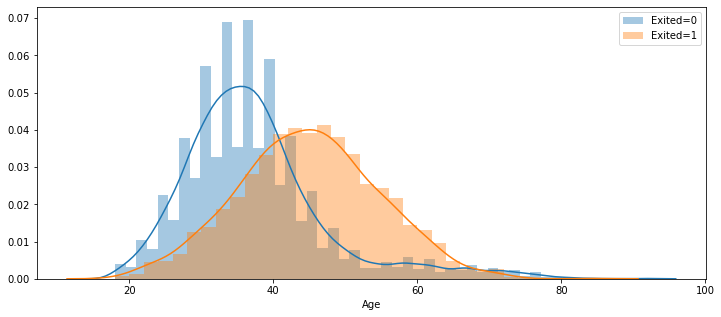

In [18]:
# Age v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['Age'][df.Exited==0])
sns.distplot(df['Age'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

#### Note - 
    - For distribution Exited =0 is higher in the age group of 20 to 40 where as the distribution of exited=1 is highers in age groups of 40 to 70, that means most of young age customers did not leave the bank and high age customers left the bank

In [19]:
# salary v/s exited
# tenure v/s exited
# balance v/s exited

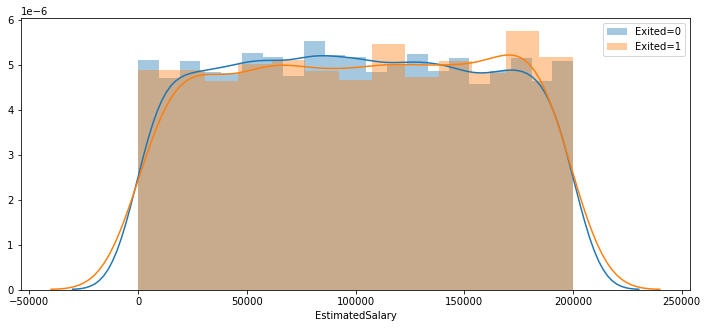

In [20]:
# EstimatedSalary v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['EstimatedSalary'][df.Exited==0])
sns.distplot(df['EstimatedSalary'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

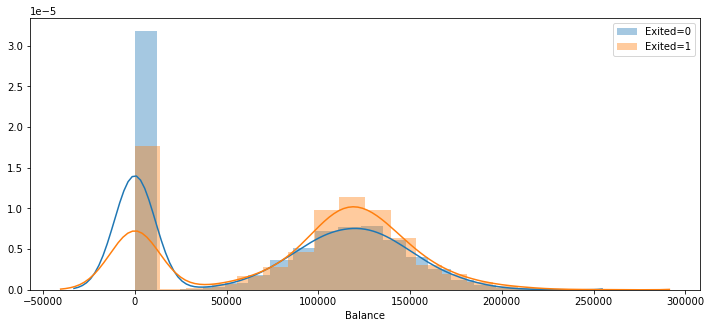

In [21]:
# Balance v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['Balance'][df.Exited==0])
sns.distplot(df['Balance'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

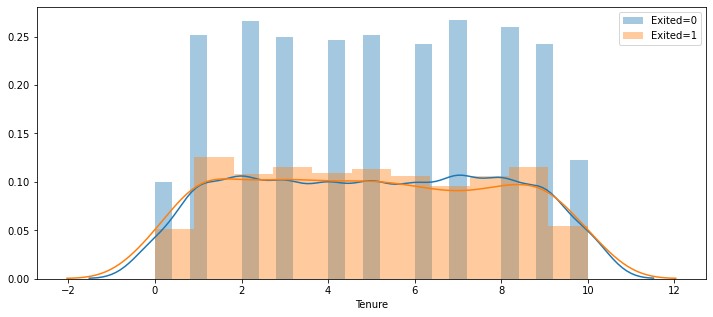

In [22]:
# Tenure v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['Tenure'][df.Exited==0])
sns.distplot(df['Tenure'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

In [23]:
# important features = Age, Balance

In [24]:
# categorical v/s categorical 
# Geography v/s Exited
pivot = pd.crosstab(df.Geography,df.Exited,margins=True)
pivot

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [25]:
ratio = pivot[1]/pivot['All']
ratio

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

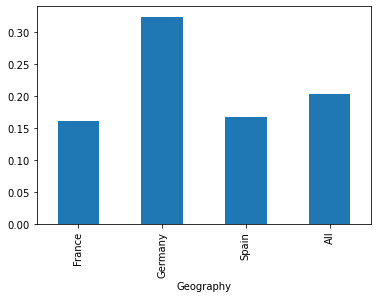

In [26]:
ratio.plot(kind='bar')

In [27]:
# Gender v/s Exited
pivot = pd.crosstab(df.Gender,df.Exited,margins=True)
ratio = pivot[1]/pivot['All']
ratio

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

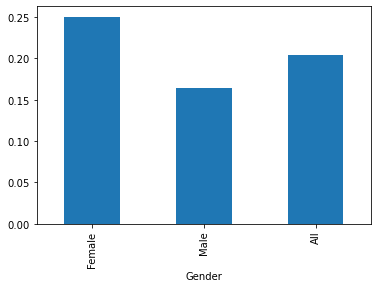

In [28]:
ratio.plot(kind='bar')

In [29]:
# HasCrCard v/s Exited
# IsActivemember v/s Exited

In [30]:
# important features - Geography, Gender, IsActivemember

#### Multivariate Analysis

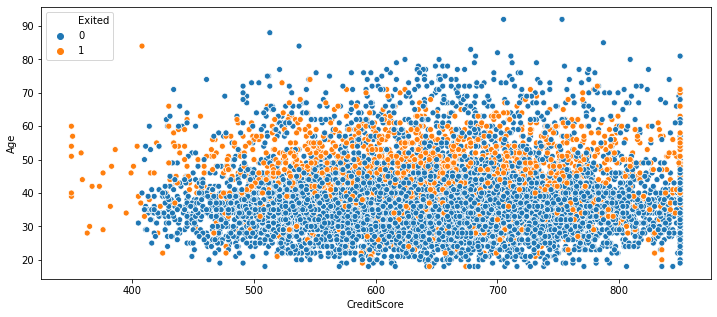

In [31]:
# numeric v/s numeric v/s categorical - scatterplot
# Age v/s Creditscore v/s Exited
plt.figure(figsize=(12,5))
sns.scatterplot(x='CreditScore',y='Age',hue="Exited",data=df)
plt.show()

In [32]:
# customers having age between 40 to 70 are leaving
# customers with creditscore less than 400 are leaving

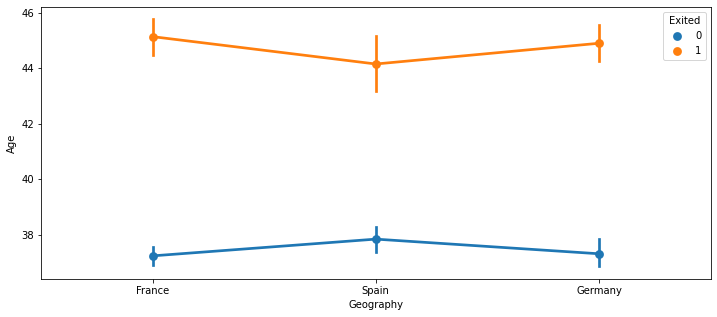

In [33]:
# Categorical v/s categorical v/s numeric = boxplot/pointplot/swarmplot
# Geography v/s Exited v/s Age
plt.figure(figsize=(12,5))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

In [34]:
# Balance v/s Numofproducts v/s Exited

### Statistical Methods

#### correlation analysis

In [35]:
cor = df.corr()
cor

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


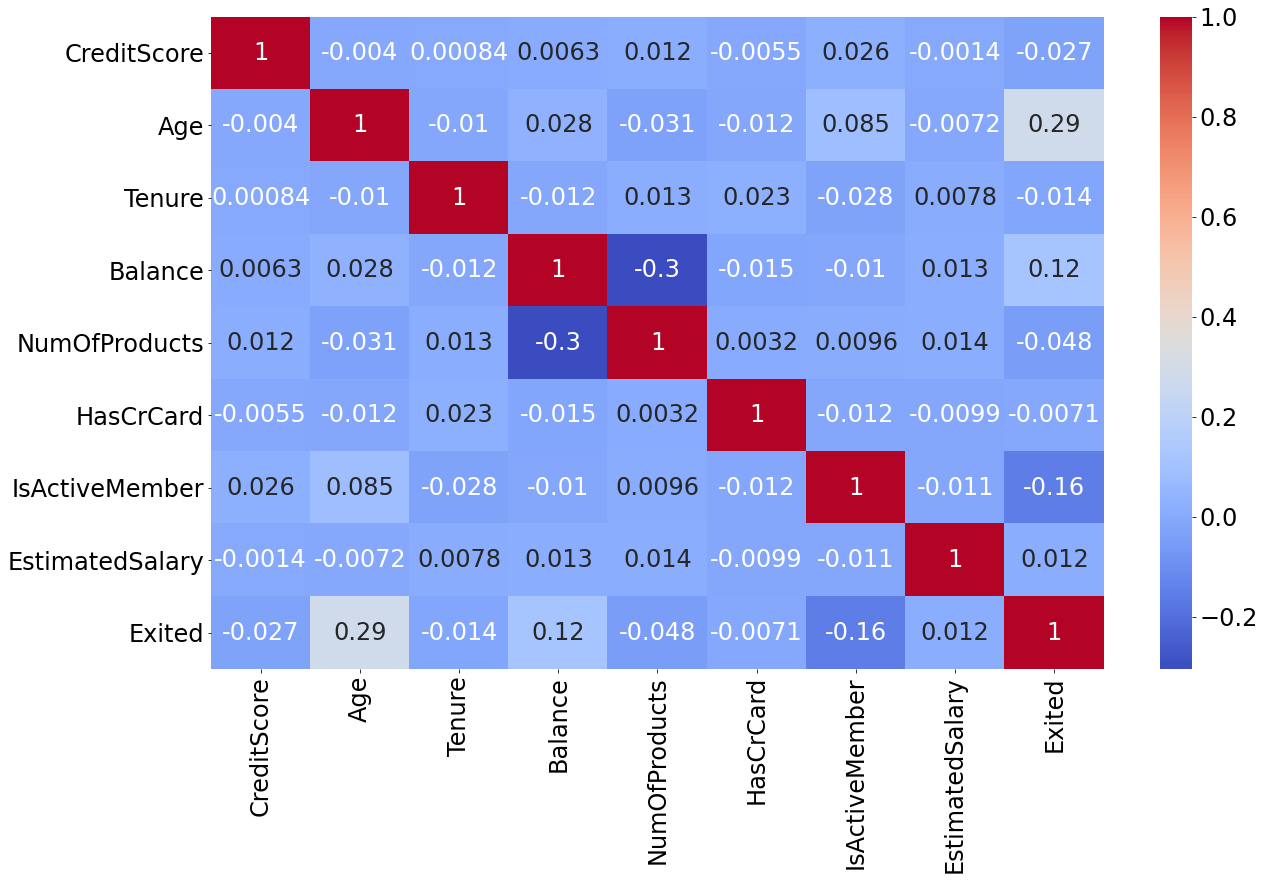

In [47]:
font = {"size":24,'family':'normal'}
import matplotlib
matplotlib.rc('font',**font)
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

    if corr(x,y) is between -0.1 to +0.1 = bad correlation

    if corr(x,y) is between +0.1 to +0.5 = good correlation
    if corr(x,y) is between -0.1 to -0.5 = good correlation

    if corr(x,y) > +0.5 = Very good correlation
    if corr(x,y) < -0.5 = Very good correlation

#### ANOVA Analysis

- Analysis of variance - F Test

       - Used to compare means of two or more samples, to check whether the means are similar or not
       - For Example - CreditScore = Anova can be used to compare mean of creditscore of customers who left the bank and mean of creditscore of customers who did not leave the bank
       
       - NULL HYPOTHESIS = means of two or more groups are similar to each other
       - Alternate Hypothesis = means of two or more grups are different than each other.
       
       For a CI = 95%, alpha = 1 - CI = 1 - 0.95 = 0.05
       
       - if pvalue > alpha = accept the Null Hypothesis, feature is not important
       - if pvalue < alpha = reject the Null Hypothesis, feature is important
    



In [49]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

xd = df[nums]
yd = df['Exited']

from sklearn.feature_selection import f_classif
fvalue,pvalue = f_classif(xd,yd)

for i in range(len(nums)):print(nums[i],pvalue[i])

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


#### Chi Square test

    - used to compare the distribution of a categorical feature in two or more groups
    
    - NULL HYPOTHESIS H0 = the distribution of categories in two or more groups is similar
    - Alternate Hypothesis, Ha = the distribution of categories in two or more groups is different
    
    for CI = 95%, alpha = 1 - CI = 1 - 0.95 = 0.05
    
    - if pvalue>alpha = accpet the Null Hypothesis, feature is not important
    - if pvalue < alpha = reject the Null Hypothesis, feautre is important.
    

In [51]:
cats = ['Geography', 'Gender',  'HasCrCard', 'IsActiveMember']
xd = df[cats]
yd = df['Exited']

xd.head()

,Geography,Gender,HasCrCard,IsActiveMember
0,France,Female,1,1
1,Spain,Female,0,1
2,France,Female,1,0
3,France,Female,0,0
4,Spain,Female,1,1


In [52]:
from sklearn.preprocessing import LabelEncoder
xd['Geography'] = LabelEncoder().fit_transform(xd['Geography'])
xd['Gender'] = LabelEncoder().fit_transform(xd['Gender'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
from sklearn.feature_selection import chi2

cval,pvalue = chi2(xd,yd)

for i in range(len(cats)):print(cats[i],pvalue[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.568036240543455e-27


In [55]:
xd

,Geography,Gender,HasCrCard,IsActiveMember
0,0,0,1,1
1,2,0,0,1
2,0,0,1,0
3,0,0,0,0
4,2,0,1,1
...,...,...,...,...
9995,0,1,1,0
9996,0,1,1,1
9997,0,0,0,1
9998,1,1,1,0


In [56]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
